Import Dependcies and Pretrained Model

In [1]:
import tensorflow_hub as hub

In [2]:
import tensorflow as tf
from  matplotlib import pyplot as plt
import numpy as np
import cv2


In [3]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [4]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [116]:
style_image = load_image('/content/drive/MyDrive/paint7.jpg')

In [117]:
content_image = load_image('/content/drive/MyDrive/park.jpg')

In [118]:
content_image.shape

TensorShape([1, 400, 600, 3])

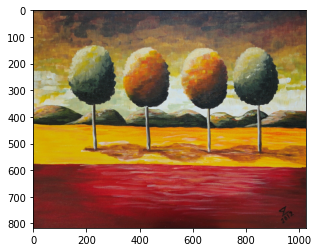

In [119]:
plt.imshow(np.squeeze(style_image))
plt.show()


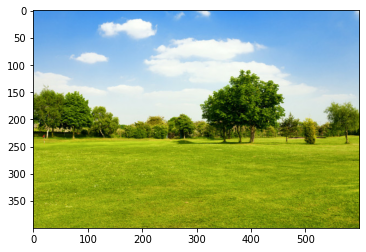

In [120]:
plt.imshow(np.squeeze(content_image))
plt.show()


In [121]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

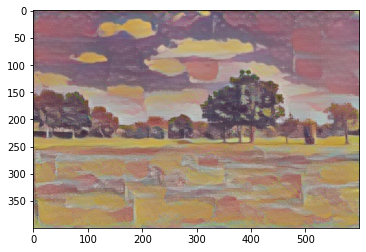

In [122]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [108]:
cv2.imwrite('/content/drive/MyDrive/generated_img13.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True